# Load the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Load the data

In [ ]:
data=pd.read_excel('/content/cust_data.xlsx')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [ ]:
data['Gender']=np.where(data['Gender'].isna(),data['Gender'].mode(dropna=True)[0],data['Gender'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  30000 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [ ]:
data.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [ ]:
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [ ]:
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


<Axes: >

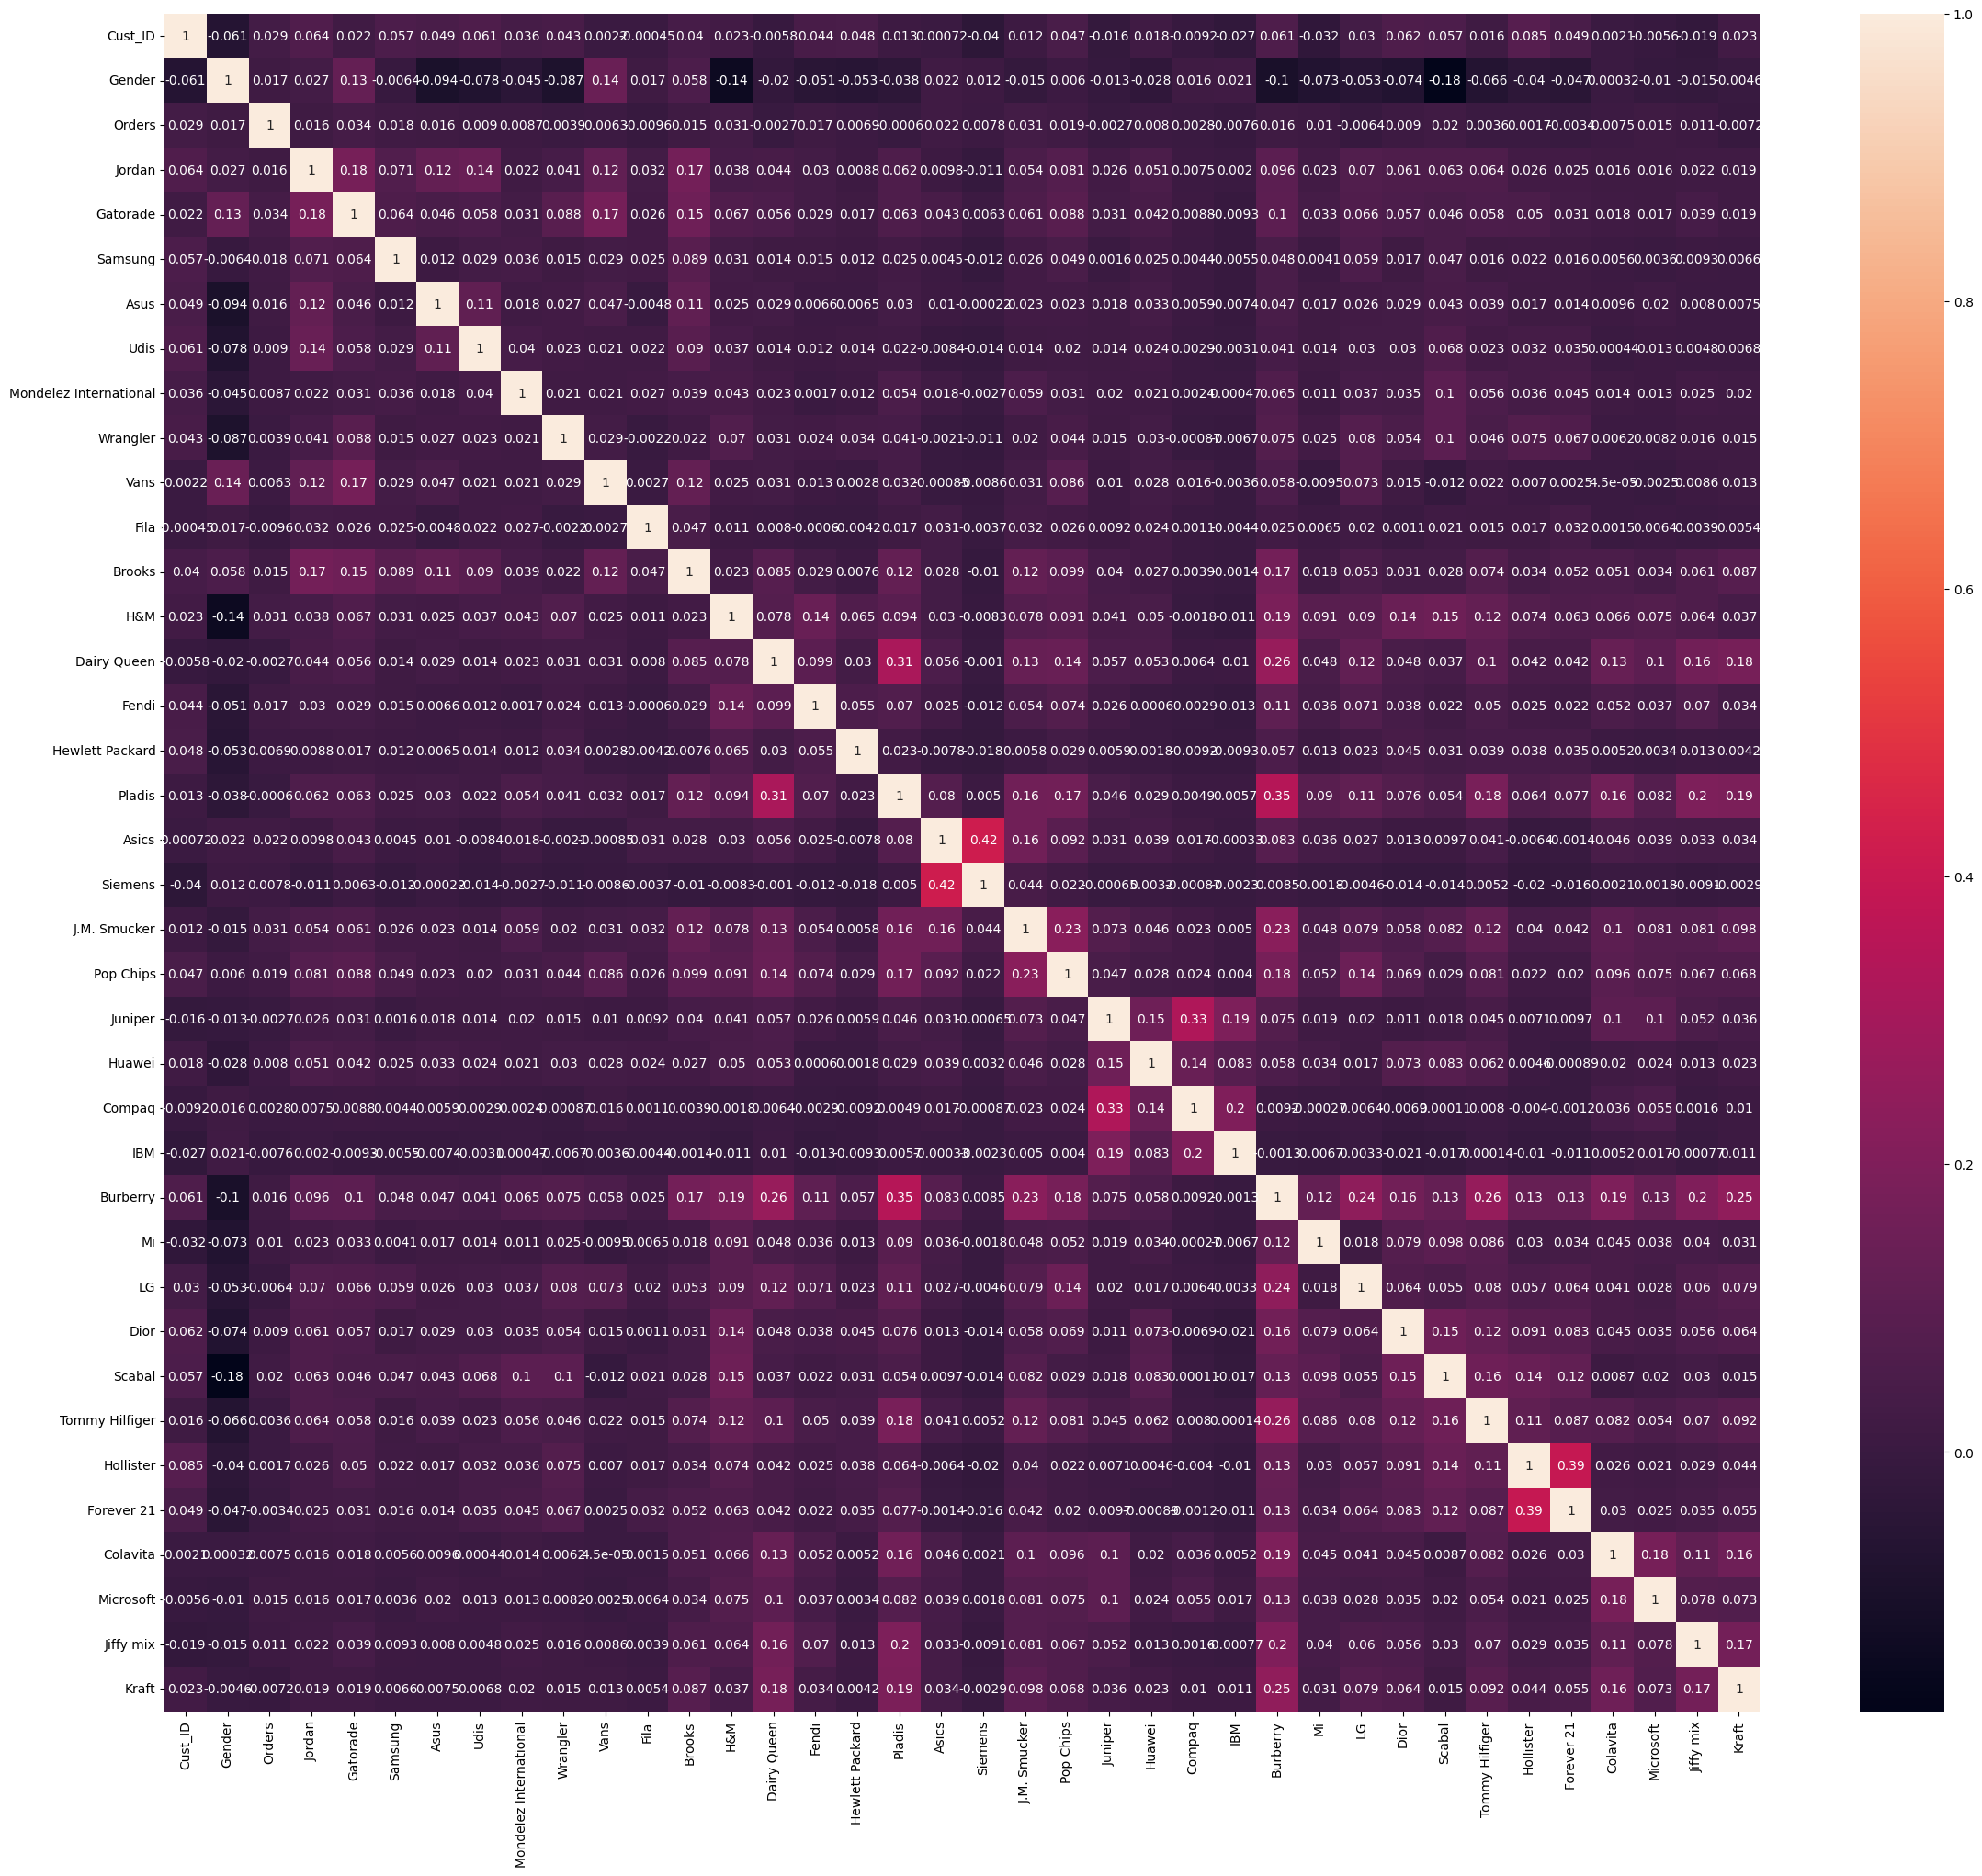

In [ ]:
plt.figure(figsize=(28,24))  # Adjust the width and height as needed
sns.heatmap(data.corr(),annot=True)

Apply clustering on the data

In [ ]:
#Elbow method
inertia=[]
for i in range(1,12):
  kmeans= KMeans(n_clusters=i)
  kmeans.fit(data)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
inertia

[2250000920306.4688,
 562501294474.2805,
 250001154187.49936,
 140626350482.65942,
 90008944123.31235,
 62511546415.42928,
 45932646470.37952,
 35167861863.604065,
 27785727492.570137,
 22505253786.10169,
 18602288315.273163]

<function matplotlib.pyplot.show(close=None, block=None)>

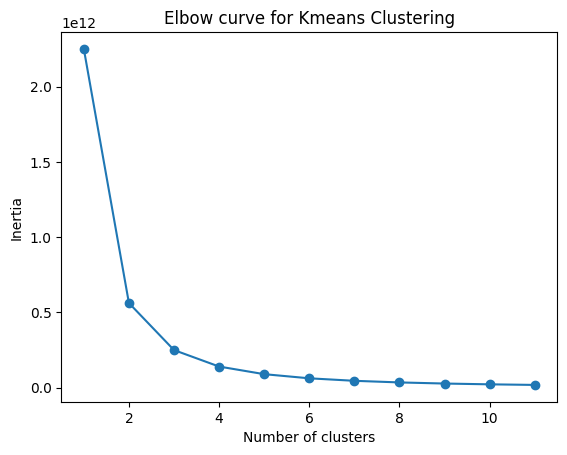

In [ ]:
plt.plot(range(1,12),inertia,'o-')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow curve for Kmeans Clustering")
plt.show

In [ ]:
data.drop(['Cust_ID'],axis=1,inplace=True)

KeyError: "['Cust_ID'] not found in axis"

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=123)
kmeans.fit(data)
data['Cluster']=kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.cluster_centers_    #centroids

array([[ 9.62877030e-02,  3.08468677e+00,  7.18097448e-01,
         6.38051044e-01,  3.90951276e-01,  3.46867749e-01,
         2.44779582e-01,  3.07424594e-01,  2.61020882e-01,
         3.66589327e-01,  1.84454756e-01,  5.75406032e-01,
         9.64037123e-01,  2.67517401e+00,  4.73317865e-01,
         3.36426914e-01,  1.14965197e+00,  1.34686775e+00,
         1.40371230e-01,  3.18677494e+00,  1.26798144e+00,
         2.79814385e+00,  7.70301624e-01,  4.54756381e-01,
         1.31090487e-01,  3.63109049e+00,  3.29466357e-01,
         6.09048724e-01,  7.00696056e-01,  7.13457077e-01,
         7.85382831e-01,  2.51740139e-01,  2.05336427e-01,
         9.61716937e-01,  4.91879350e-01,  4.86078886e-01,
         5.26682135e-01,  1.25754060e+00],
       [ 1.78603104e-01,  8.75598670e+00,  2.68625277e-01,
         2.67849224e-01,  2.30266075e-01,  1.69955654e-01,
         1.46230599e-01,  1.40133038e-01,  1.05099778e-01,
         1.13525499e-01,  8.72505543e-02,  1.42904656e-01,
         3.46

In [ ]:
kmeans.n_iter_     #no of iterations (the no of times centroids change)

28

In [ ]:
data.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,10,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


<Axes: xlabel='Cluster'>

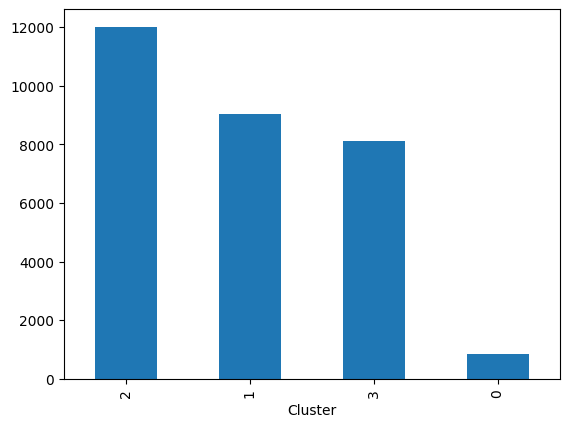

In [ ]:
data['Cluster'].value_counts().plot(kind='bar')


In [ ]:
cluster_behavior = data.groupby('Cluster').mean()


In [ ]:
print(cluster_behavior)
#find out the cluster behaviour and analyse which has more values

           Gender    Orders    Jordan  Gatorade   Samsung      Asus      Udis  \
Cluster                                                                         
0        0.096288  3.084687  0.718097  0.638051  0.390951  0.346868  0.244780   
1        0.178603  8.755987  0.268625  0.267849  0.230266  0.169956  0.146231   
2        0.168916  0.601699  0.230968  0.204564  0.195152  0.139763  0.133267   
3        0.184911  4.466469  0.272189  0.264793  0.238042  0.163955  0.144970   

         Mondelez International  Wrangler      Vans  ...        LG      Dior  \
Cluster                                              ...                       
0                      0.307425  0.261021  0.366589  ...  0.609049  0.700696   
1                      0.140133  0.105100  0.113525  ...  0.092350  0.270288   
2                      0.125354  0.096368  0.094953  ...  0.091538  0.251041   
3                      0.142875  0.108235  0.106386  ...  0.076307  0.256164   

           Scabal  Tommy Hilfige

In [ ]:
#After this we can use ml to predict for the future (our choice)
y=data['Cluster']
x=data.drop(['Cluster'],axis=1)

In [ ]:
print((silhouette_score(data,kmeans.fit_predict(data))))               #It should be close to positive 1 for a good value

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.22556931517122222
